# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)



In [ ]:
def random_tour(n):
    """Create a random tour"""

    random.seed(1234)
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[2, 8, 3, 5, 6, 4, 9, 0, 1, 7]

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """
    np.random.seed(1234)

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [ ]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(float(tl))

tour = random_tour(10)
tour_length(tsp, tour)

print(f"Tour: {tour}")
print(f"Tour length: {tour_length(tsp, tour)}")

Tour: [2, 8, 3, 5, 6, 4, 9, 0, 1, 7]
Tour length: 4.943798767765629


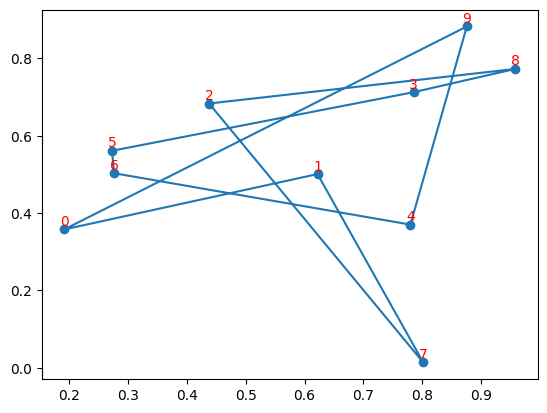

In [ ]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"])

    for i, (x, y) in enumerate(zip(pos["x"], pos["y"])):
        plt.text(x, y + 0.01, str(i), color='red', fontsize=10, ha='center')


    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.iloc[[0]]])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [ ]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘foreach’

trying URL 'http://cran.us.r-project.org/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/foreach_1.5.2.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/TSP_1.2-5.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmp62wpZq/downloaded_packages’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/microbenchmark_1.5.0.tar.gz'
Content type 'application/x-gzip' length 61673 bytes (60 KB)
downloaded 60 KB


The downloaded source packages are in
	‘/tmp/Rtmp62wpZq/downloaded_packages’


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [ ]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


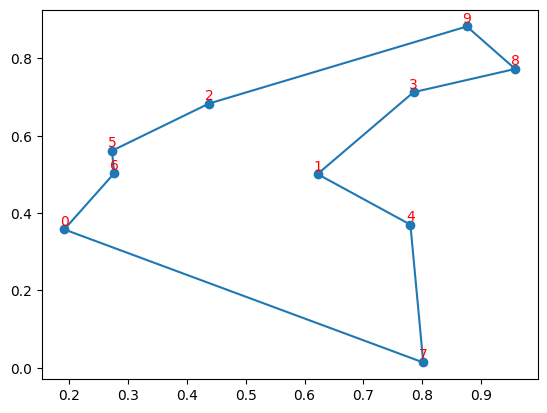

[2 9 8 3 1 4 7 0 6 5]
2.763573577757701


In [ ]:
show_tsp(tsp, tour)
print(tour)
print(tour_length(tsp, tour))

How long does it take to solve the problem 100 times?

In [ ]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr     min       lq     mean   median       uq     max neval
 tsp <- TSP(d) 334.211 362.9995 395.8607 380.4415 408.4455 654.291   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

Initial state (conflicts = 4)


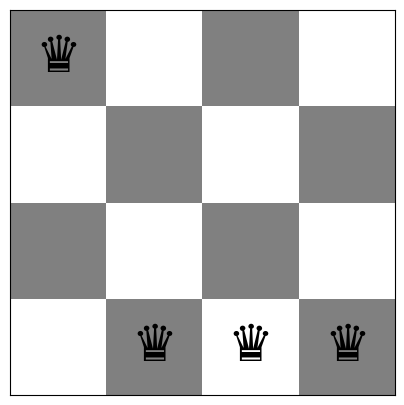

Step 1: conflicts = 2


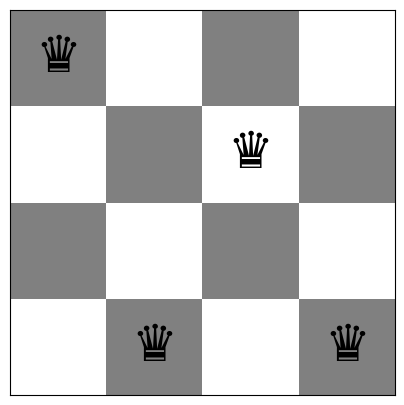

Step 2: conflicts = 1


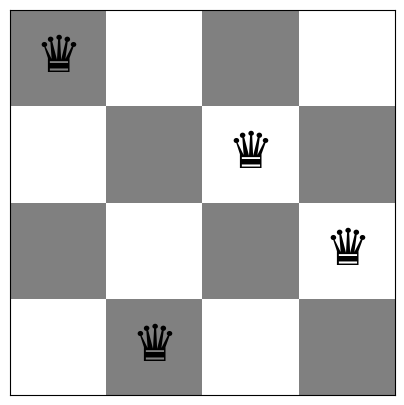

Stopped at step 2. Local optimum with 1 conflicts.
Final solution: [3, 0, 2, 1]
Final conflicts: 1


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# --- hiển thị bàn cờ ---
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    n = len(board)
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = 37,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    plt.gca().invert_yaxis()
    plt.show()


# --- conflicts: số cặp hậu tấn công nhau ---
def conflicts(board):
    n = len(board)
    c = 0
    for i in range(n):
        for j in range(i+1, n):
            if board[i] == board[j] or abs(board[i]-board[j]) == abs(i-j):
                c += 1
    return c


# --- Tạo trạng thái ngẫu nhiên ---
def random_state(n):
    # mỗi cột 1 hậu, chọn hàng 0..n-1
    return [random.randint(0, n-1) for _ in range(n)]


# --- Tìm best neighbor theo steepest-ascent:
# di chuyển từng hậu trong cột của nó đến mọi hàng khác, chọn move giảm conflicts nhiều nhất
def best_neighbor_steepest(state):
    n = len(state)
    current_conf = conflicts(state)
    best_state = list(state)
    best_conf = current_conf

    # thử mọi cột, mọi hàng khác
    for col in range(n):
        orig_row = state[col]
        for row in range(n):
            if row == orig_row:
                continue
            candidate = list(state)
            candidate[col] = row
            cand_conf = conflicts(candidate)
            if cand_conf < best_conf:
                best_conf = cand_conf
                best_state = candidate
    return best_state, best_conf


# --- Steepest-ascent Hill Climbing chính ---
def steepest_ascent_hill_climbing(n, max_steps=1000, show_steps=False, seed=None):
    if seed is not None:
        random.seed(seed)

    current = random_state(n)
    current_conf = conflicts(current)

    if show_steps:
        print(f"Initial state (conflicts = {current_conf})")
        show_board(current)

    for step in range(1, max_steps+1):
        neighbor, neighbor_conf = best_neighbor_steepest(current)

        # nếu không có cải thiện (neighbor_conf >= current_conf) thì dừng
        if neighbor_conf >= current_conf:
            print(f"Stopped at step {step-1}. Local optimum with {current_conf} conflicts.")
            break

        # cập nhật current
        current, current_conf = neighbor, neighbor_conf
        if show_steps:
            print(f"Step {step}: conflicts = {current_conf}")
            show_board(current)

        if current_conf == 0:
            print(f"Solution found at step {step}!")
            break

    return current, current_conf


# --- Ví dụ chạy ---
if __name__ == "__main__":
    # cố định ngẫu nhiên để dễ lặp lại (tùy chọn)
    # random.seed(1234)

    n = 4
    solution, final_conf = steepest_ascent_hill_climbing(n, max_steps=200, show_steps=True, seed=1234)
    print("Final solution:", solution)
    print("Final conflicts:", final_conf)


## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.


--- Restart #1 ---
Initial state (conflicts = 4)


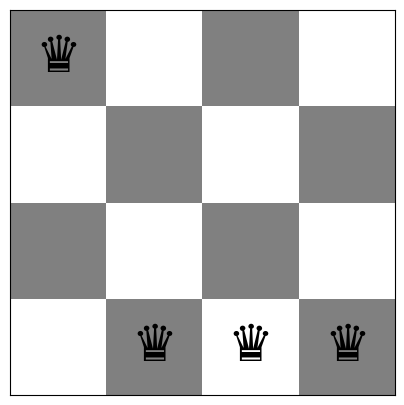

Step 1: conflicts = 2


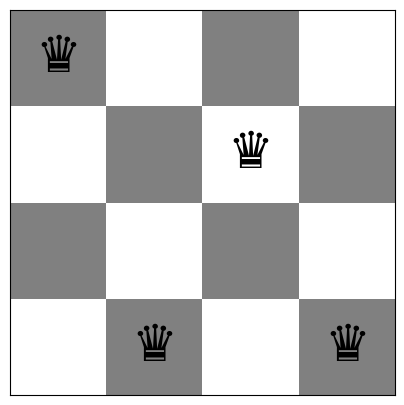

Step 2: conflicts = 1


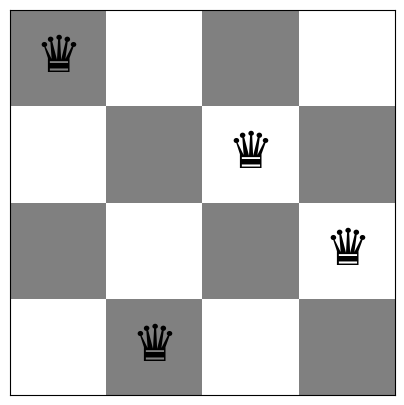

Stopped at step 2. Local optimum with 1 conflicts.

--- Restart #2 ---
Initial state (conflicts = 4)


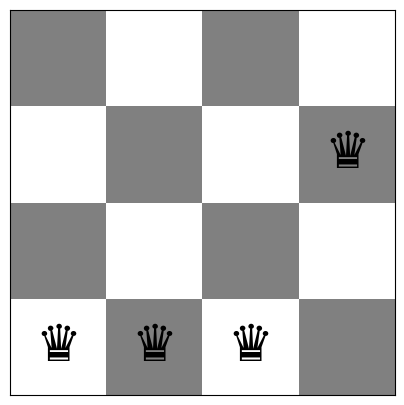

Step 1: conflicts = 1


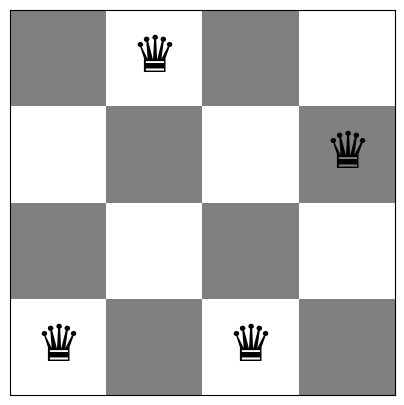

Step 2: conflicts = 0


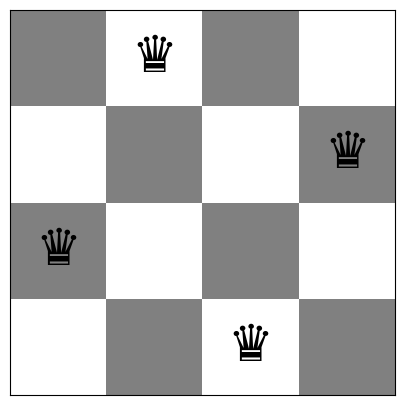

Solution found at step 2!

Solution found after 2 restart(s)!
Final solution: [1, 3, 0, 2]
Final conflicts: 0


In [5]:
def hill_climbing_with_random_restarts_show(n, max_steps=1000, max_restarts=50, seed=None):
    """
    Steepest-Ascent Hill Climbing với Random Restarts và hiển thị bàn cờ từng bước
    """
    if seed is not None:
        random.seed(seed)

    for restart in range(1, max_restarts+1):
        print(f"\n--- Restart #{restart} ---")

        state, final_conf = steepest_ascent_hill_climbing(
            n, max_steps=max_steps, show_steps=True
        )

        if final_conf == 0:
            print(f"\nSolution found after {restart} restart(s)!")
            return state, final_conf

    print("\nNo solution found after maximum restarts.")
    return state, final_conf

if __name__ == "__main__":
    n = 4
    solution, final_conf = hill_climbing_with_random_restarts_show(n, max_steps=200, max_restarts=20, seed=1234)
    print("Final solution:", solution)
    print("Final conflicts:", final_conf)


## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

Initial state (conflicts = 4)


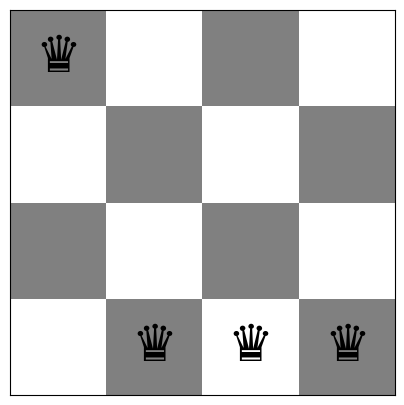

Step 1: conflicts = 2


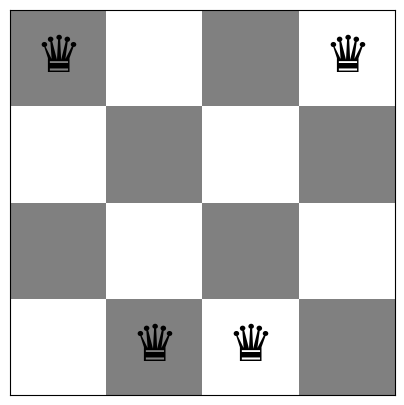

Stopped at step 1. Local optimum with 2 conflicts.
Final solution: [3, 0, 0, 3]
Final conflicts: 2


In [6]:
def best_neighbors_uphill(state):
    """
    Trả về danh sách các neighbor có conflicts < current conflicts
    """
    n = len(state)
    current_conf = conflicts(state)
    neighbors = []

    for col in range(n):
        orig_row = state[col]
        for row in range(n):
            if row == orig_row:
                continue
            candidate = list(state)
            candidate[col] = row
            cand_conf = conflicts(candidate)
            if cand_conf < current_conf:
                neighbors.append((candidate, cand_conf))

    return neighbors


def stochastic_hill_climbing(n, max_steps=1000, seed=None, show_steps=False):
    """
    Stochastic Hill Climbing cho N-Queens
    """
    if seed is not None:
        random.seed(seed)

    current = random_state(n)
    current_conf = conflicts(current)

    if show_steps:
        print(f"Initial state (conflicts = {current_conf})")
        show_board(current)

    for step in range(1, max_steps+1):
        uphill_neighbors = best_neighbors_uphill(current)

        if not uphill_neighbors:
            print(f"Stopped at step {step-1}. Local optimum with {current_conf} conflicts.")
            break

        # chọn ngẫu nhiên 1 neighbor trong các uphill moves
        current, current_conf = random.choice(uphill_neighbors)

        if show_steps:
            print(f"Step {step}: conflicts = {current_conf}")
            show_board(current)

        if current_conf == 0:
            print(f"Solution found at step {step}!")
            break

    return current, current_conf


# --- Ví dụ chạy ---
if __name__ == "__main__":
    n = 4
    solution, final_conf = stochastic_hill_climbing(n, max_steps=200, seed=1234, show_steps=True)
    print("Final solution:", solution)
    print("Final conflicts:", final_conf)


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Initial state (conflicts = 4)


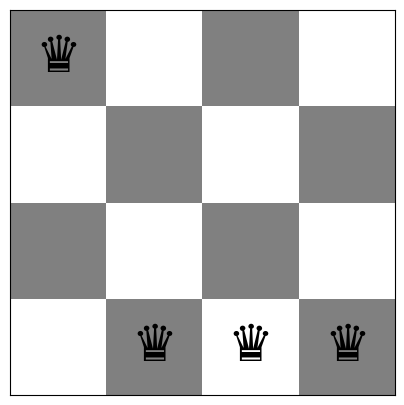

Step 4: conflicts = 2


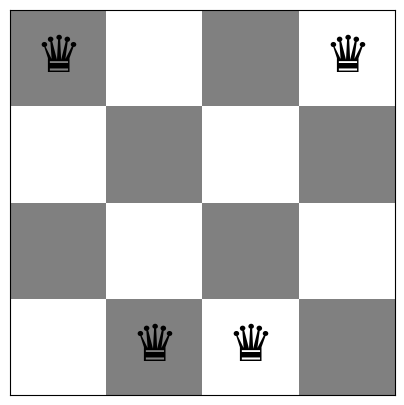

Stopped after 500 steps. Local optimum with 2 conflicts.
Final solution: [3, 0, 0, 3]
Final conflicts: 2


In [7]:
def random_neighbor(state):
    """
    Sinh 1 neighbor ngẫu nhiên bằng cách đổi vị trí 1 quân hậu trong 1 cột
    """
    n = len(state)
    col = random.randint(0, n-1)        # chọn cột ngẫu nhiên
    row = random.randint(0, n-1)        # chọn hàng ngẫu nhiên
    while row == state[col]:             # đảm bảo khác vị trí cũ
        row = random.randint(0, n-1)

    neighbor = list(state)
    neighbor[col] = row
    return neighbor


def first_choice_hill_climbing(n, max_steps=1000, seed=None, show_steps=False):
    """
    First-Choice Hill Climbing cho N-Queens
    """
    if seed is not None:
        random.seed(seed)

    current = random_state(n)
    current_conf = conflicts(current)

    if show_steps:
        print(f"Initial state (conflicts = {current_conf})")
        show_board(current)

    for step in range(1, max_steps+1):
        neighbor = random_neighbor(current)
        neighbor_conf = conflicts(neighbor)

        if neighbor_conf < current_conf:    # chấp nhận neighbor tốt hơn
            current, current_conf = neighbor, neighbor_conf
            if show_steps:
                print(f"Step {step}: conflicts = {current_conf}")
                show_board(current)

        if current_conf == 0:
            print(f"Solution found at step {step}!")
            break

    if current_conf != 0:
        print(f"Stopped after {max_steps} steps. Local optimum with {current_conf} conflicts.")

    return current, current_conf


# --- Ví dụ chạy ---
if __name__ == "__main__":
    n = 4
    solution, final_conf = first_choice_hill_climbing(n, max_steps=500, seed=1234, show_steps=True)
    print("Final solution:", solution)
    print("Final conflicts:", final_conf)


## Simulated Annealing [2 Points]

Initial state (conflicts = 4)


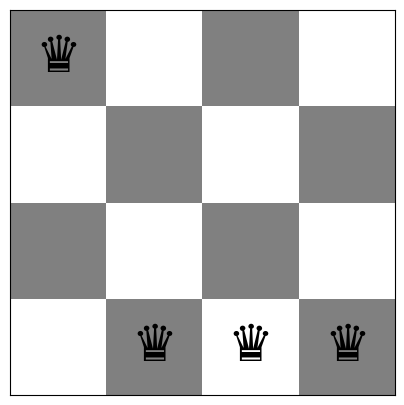

Step 1: conflicts = 6, T=100.00


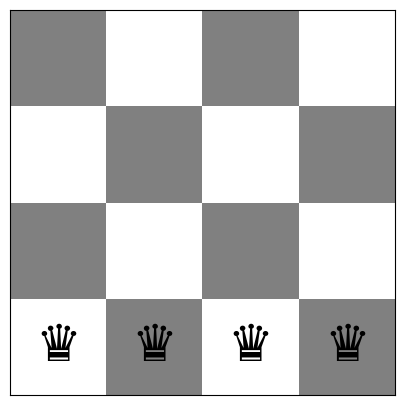

Step 2: conflicts = 5, T=99.00


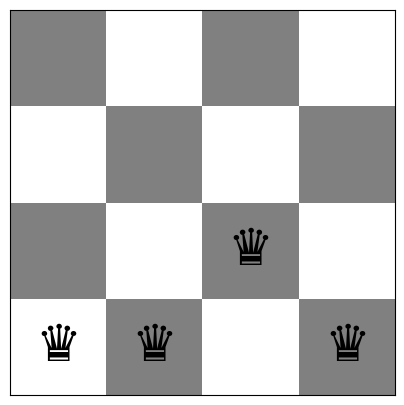

Step 3: conflicts = 3, T=98.01


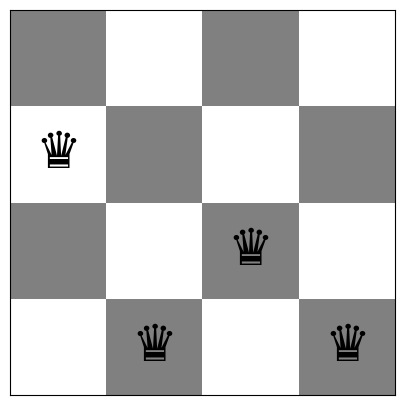

Step 4: conflicts = 1, T=97.03


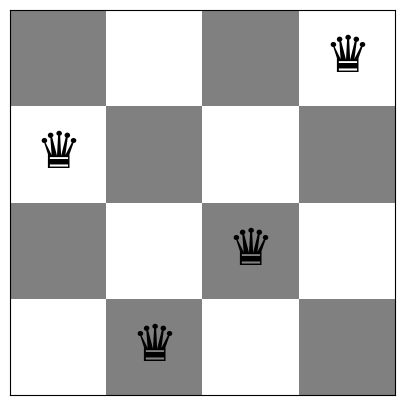

Step 5: conflicts = 3, T=96.06


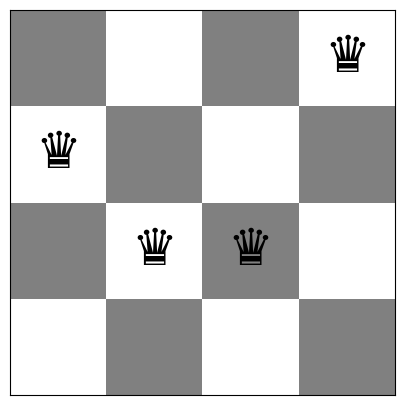

Step 6: conflicts = 4, T=95.10


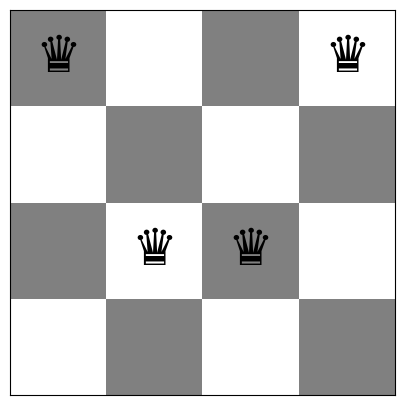

Step 7: conflicts = 3, T=94.15


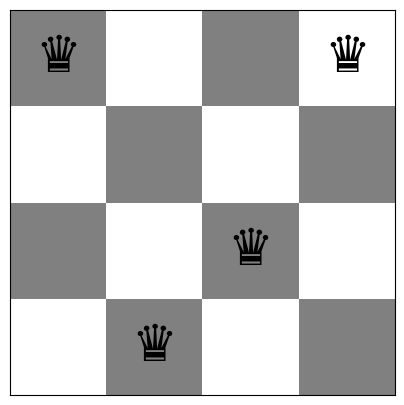

Step 8: conflicts = 5, T=93.21


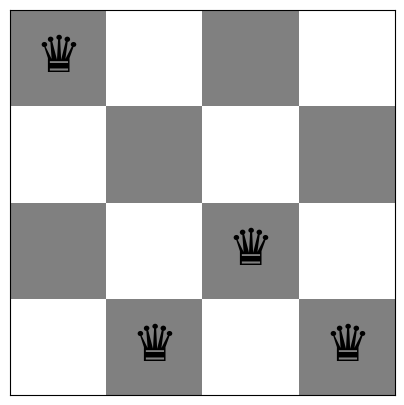

Step 9: conflicts = 5, T=92.27


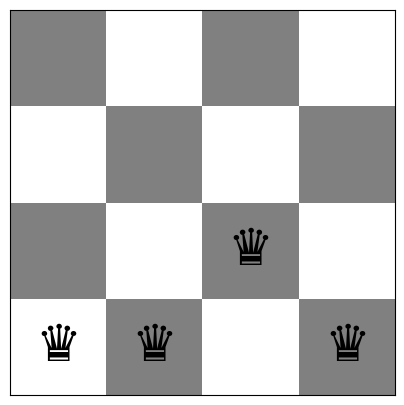

Step 10: conflicts = 3, T=91.35


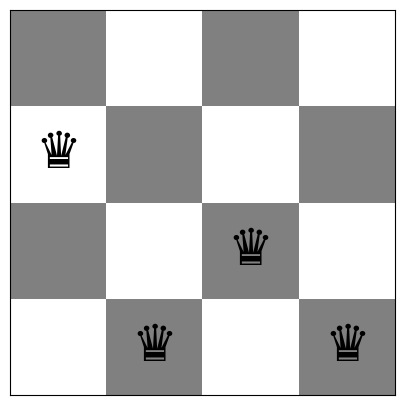

Step 11: conflicts = 4, T=90.44


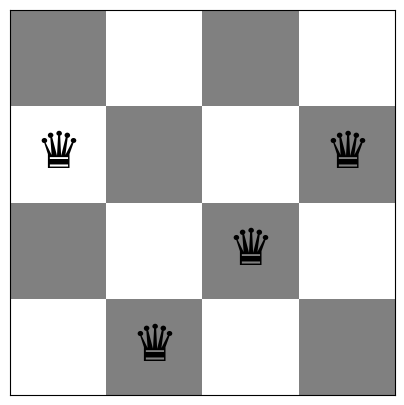

Step 12: conflicts = 3, T=89.53


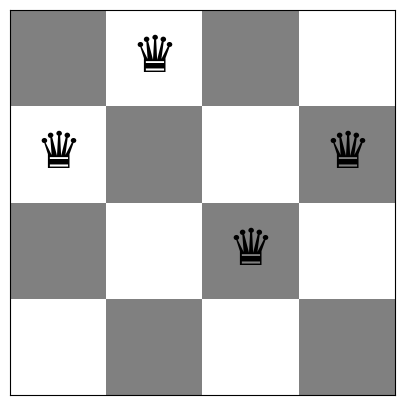

Step 13: conflicts = 1, T=88.64


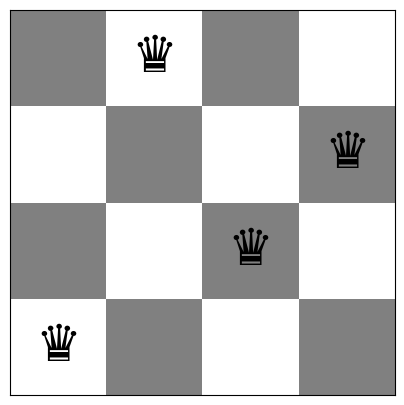

Step 14: conflicts = 3, T=87.75


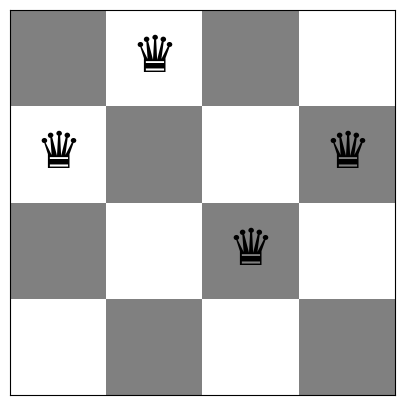

Step 15: conflicts = 2, T=86.87


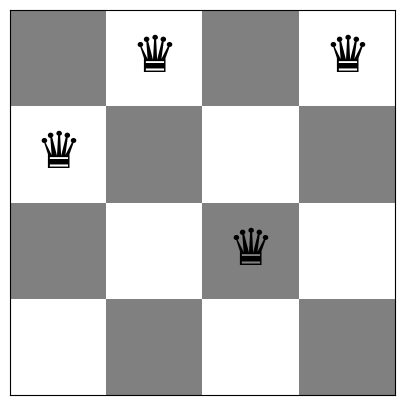

Step 16: conflicts = 1, T=86.01


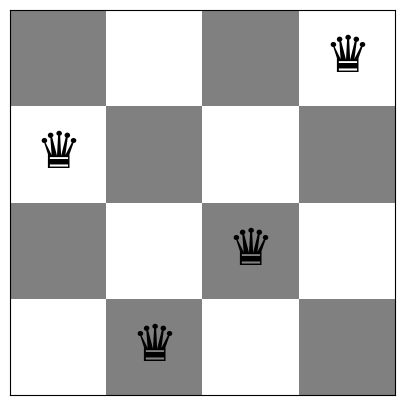

Step 17: conflicts = 3, T=85.15


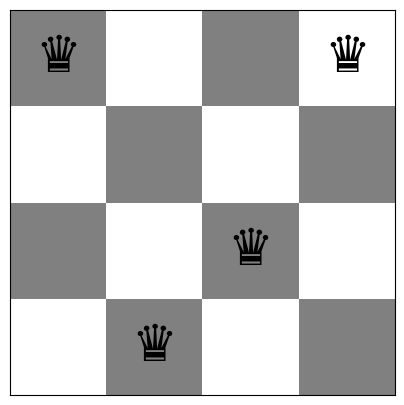

Step 18: conflicts = 4, T=84.29


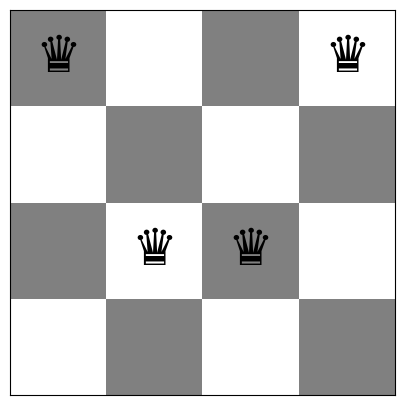

Step 19: conflicts = 3, T=83.45


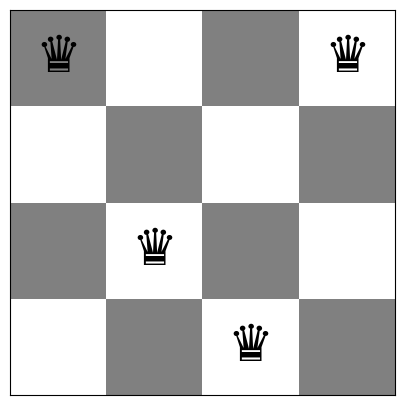

Step 20: conflicts = 2, T=82.62


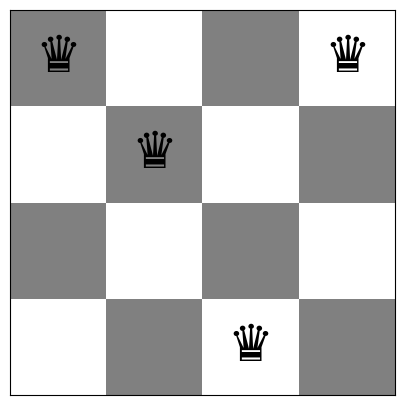

Step 21: conflicts = 4, T=81.79


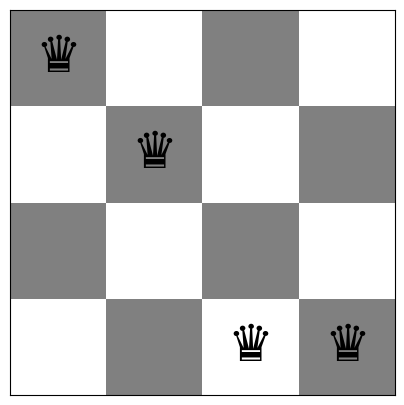

Step 22: conflicts = 3, T=80.97


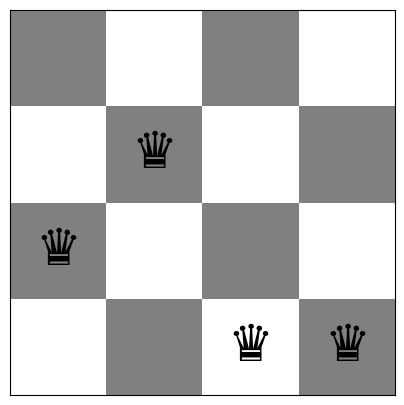

Step 23: conflicts = 5, T=80.16


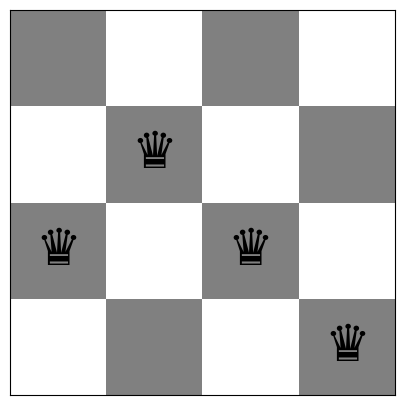

Step 24: conflicts = 2, T=79.36


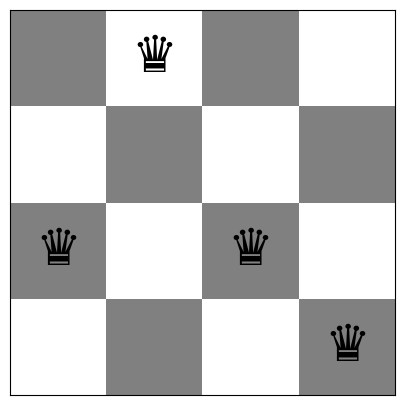

Step 25: conflicts = 4, T=78.57


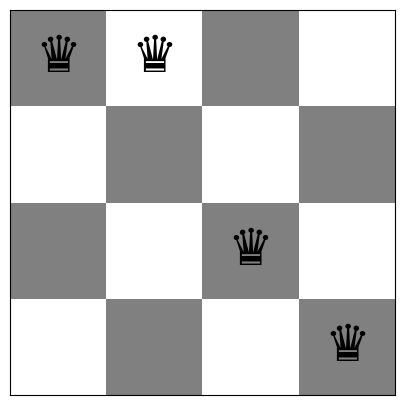

Step 26: conflicts = 3, T=77.78


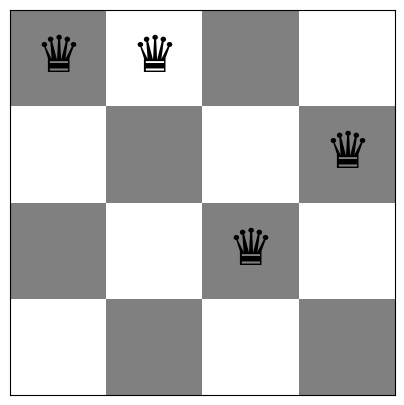

Step 27: conflicts = 4, T=77.00


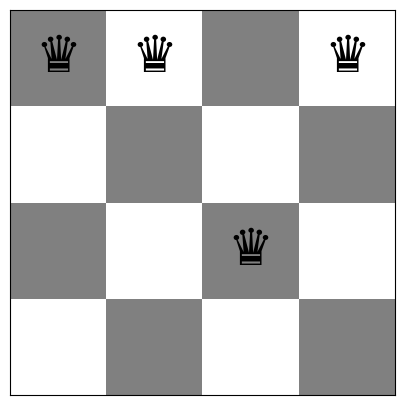

Step 28: conflicts = 4, T=76.23


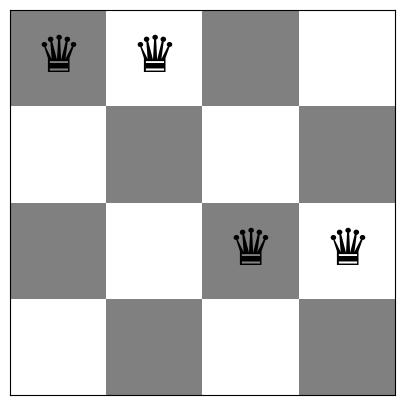

Step 29: conflicts = 3, T=75.47


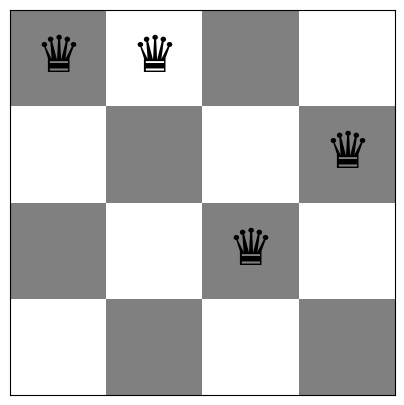

Step 30: conflicts = 1, T=74.72


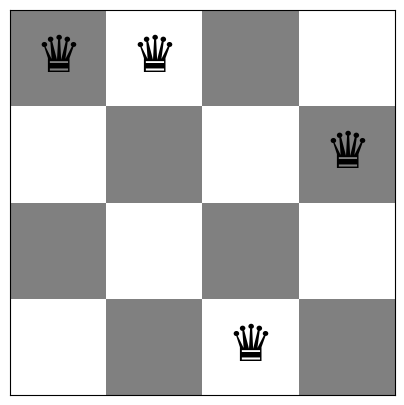

Step 31: conflicts = 2, T=73.97


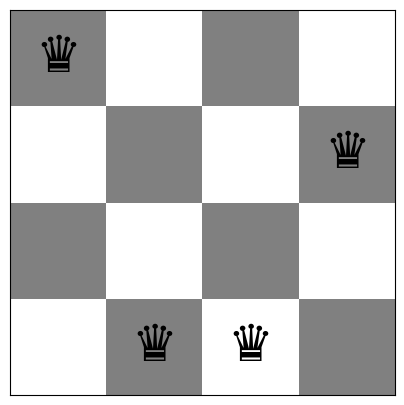

Step 32: conflicts = 4, T=73.23


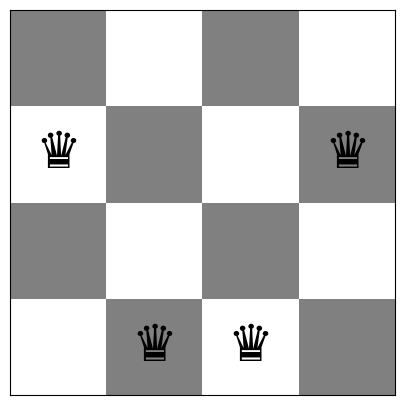

Step 33: conflicts = 4, T=72.50


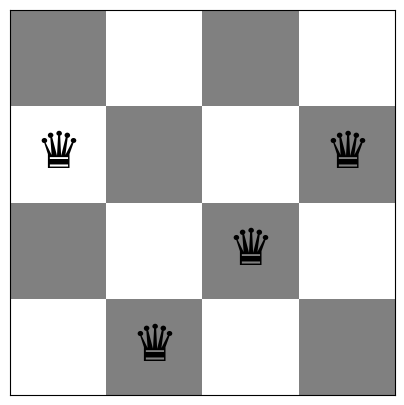

Step 34: conflicts = 4, T=71.77


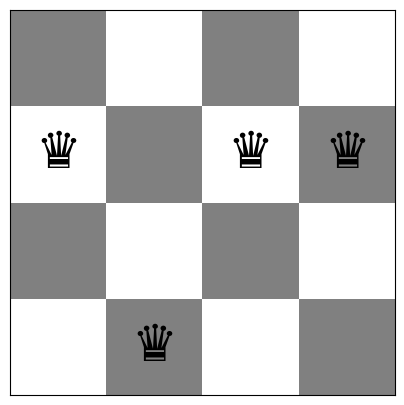

Step 35: conflicts = 2, T=71.06


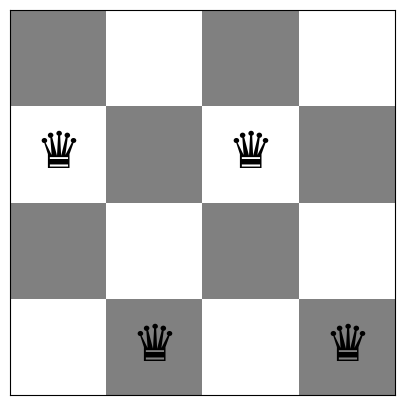

Step 36: conflicts = 2, T=70.34


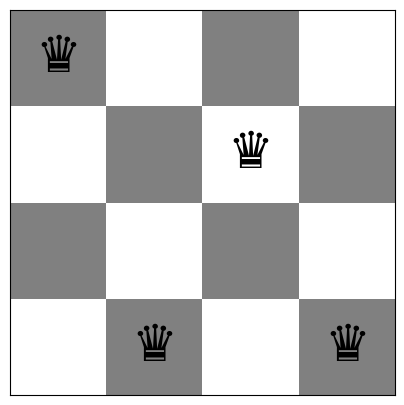

Step 37: conflicts = 4, T=69.64


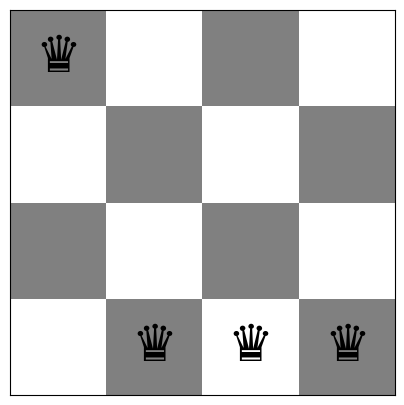

Step 38: conflicts = 4, T=68.94


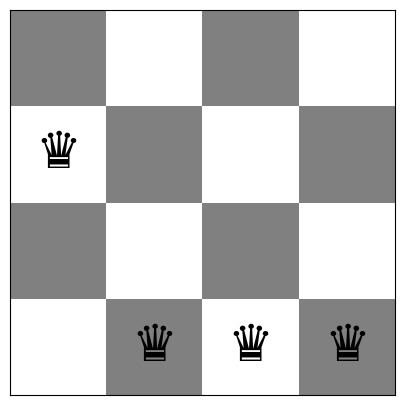

Step 39: conflicts = 4, T=68.26


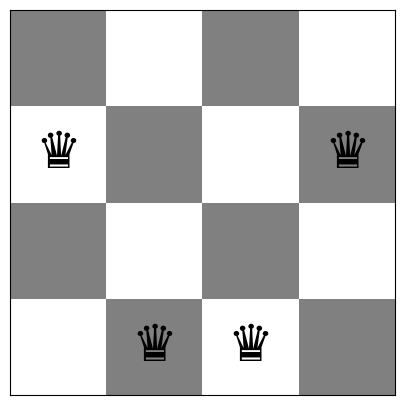

Step 40: conflicts = 3, T=67.57


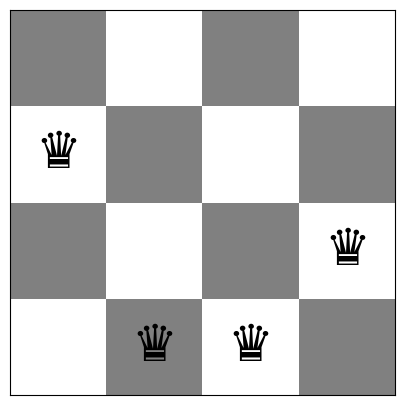

Step 41: conflicts = 2, T=66.90


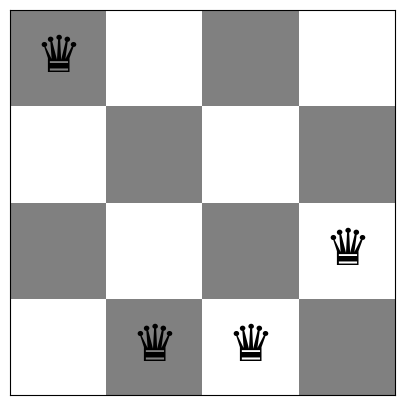

Step 42: conflicts = 3, T=66.23


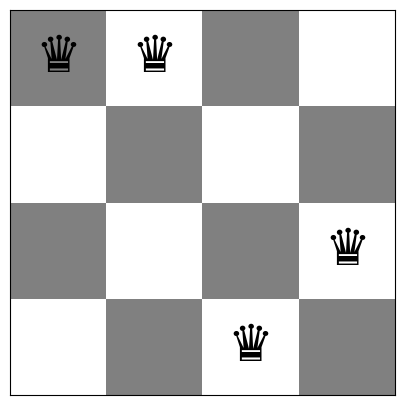

Step 43: conflicts = 4, T=65.57


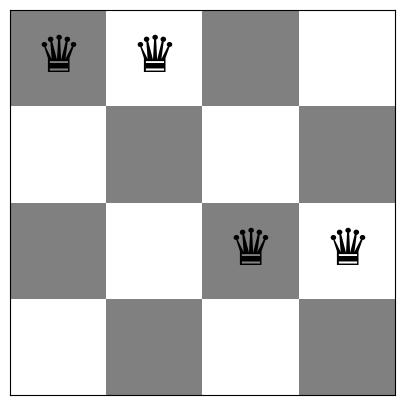

Step 44: conflicts = 3, T=64.91


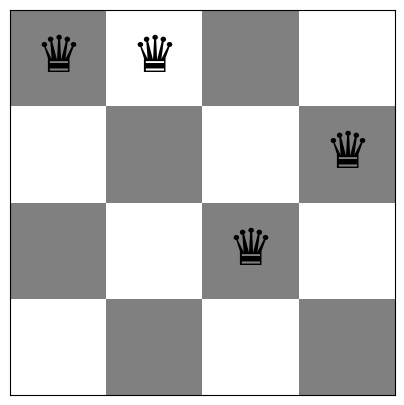

Step 45: conflicts = 3, T=64.26


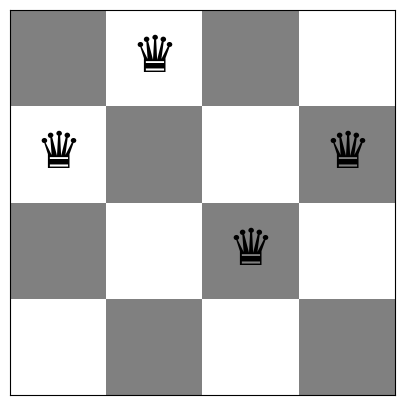

Step 46: conflicts = 2, T=63.62


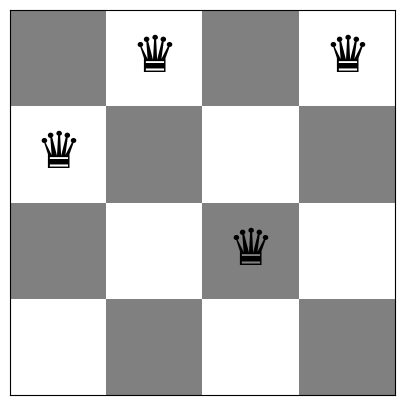

Step 47: conflicts = 3, T=62.98


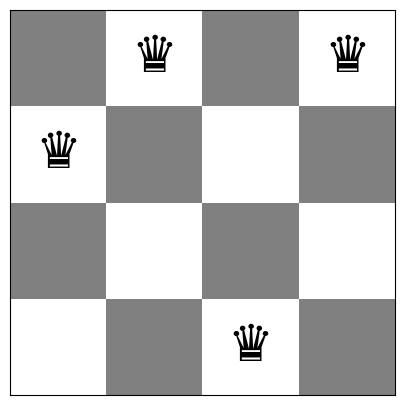

Step 48: conflicts = 2, T=62.35


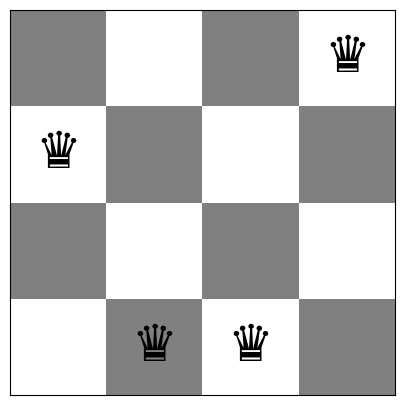

Step 49: conflicts = 1, T=61.73


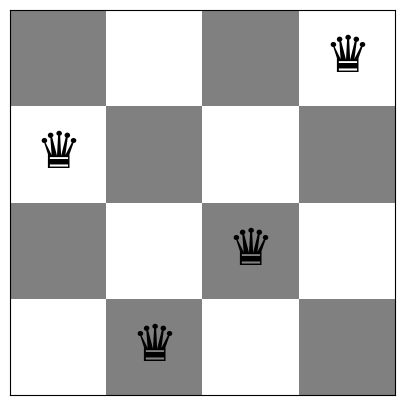

Step 50: conflicts = 3, T=61.11


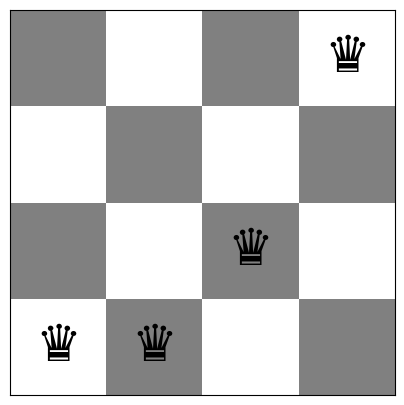

Step 51: conflicts = 4, T=60.50


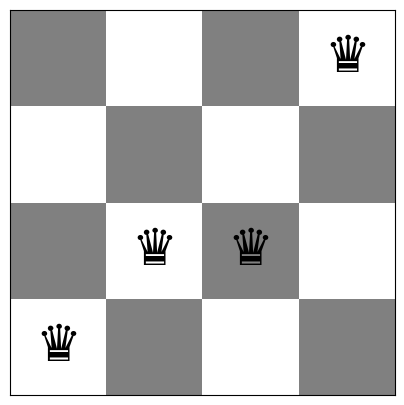

Step 52: conflicts = 3, T=59.90


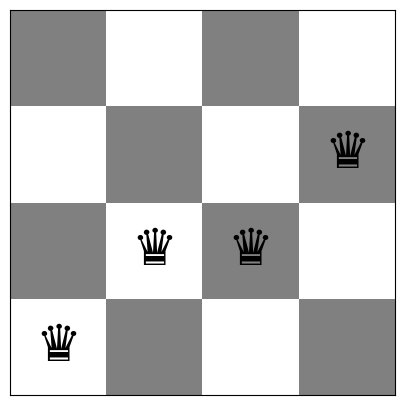

Step 53: conflicts = 1, T=59.30


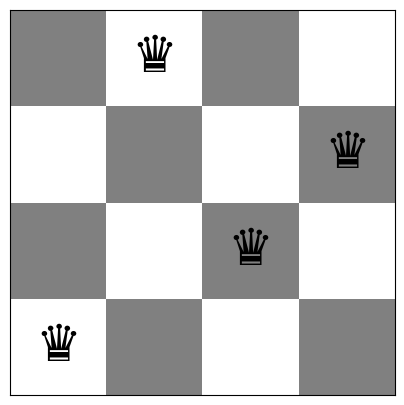

Step 54: conflicts = 3, T=58.70


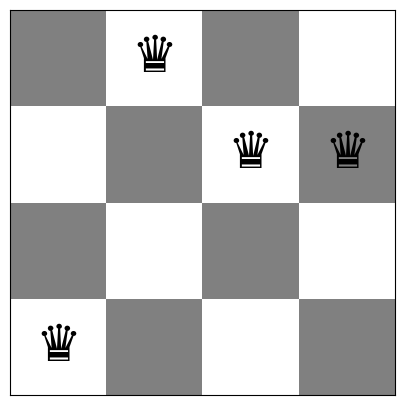

Step 55: conflicts = 4, T=58.12


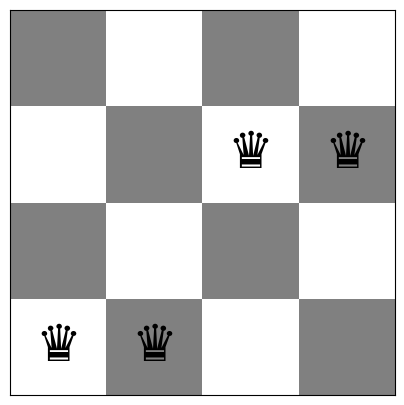

Step 56: conflicts = 3, T=57.54


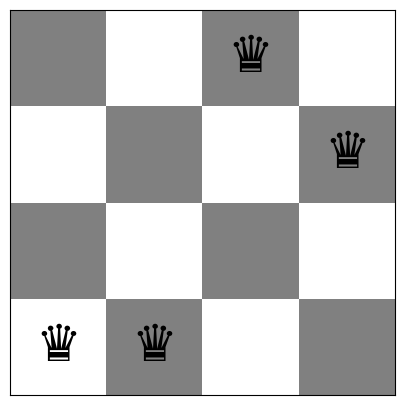

Step 57: conflicts = 3, T=56.96


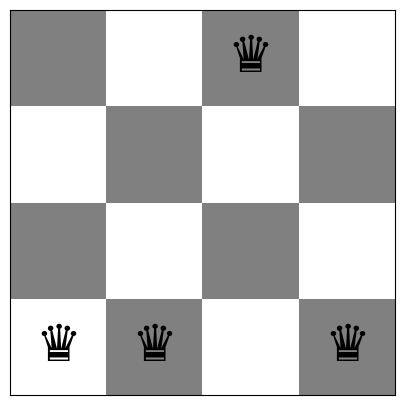

Step 58: conflicts = 5, T=56.39


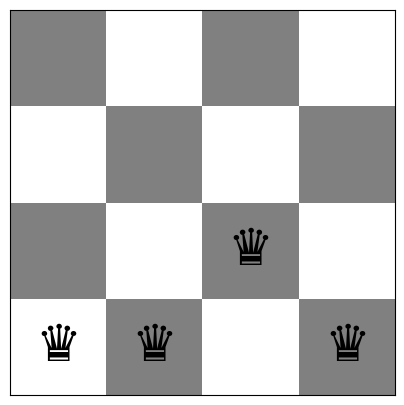

Step 59: conflicts = 4, T=55.83


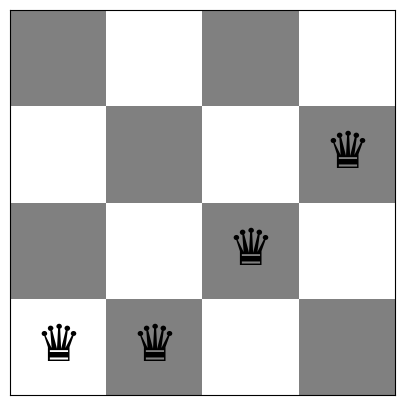

Step 60: conflicts = 3, T=55.27


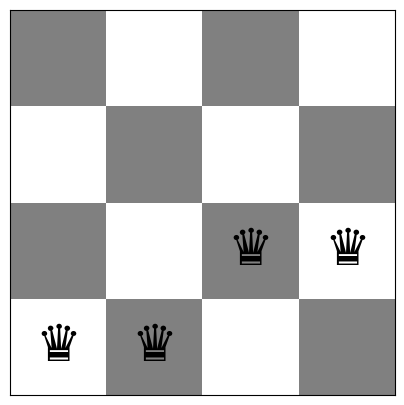

Step 61: conflicts = 3, T=54.72


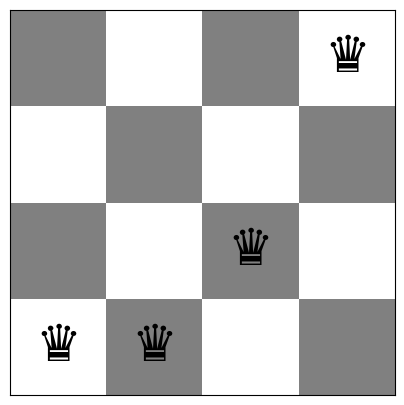

Step 62: conflicts = 3, T=54.17


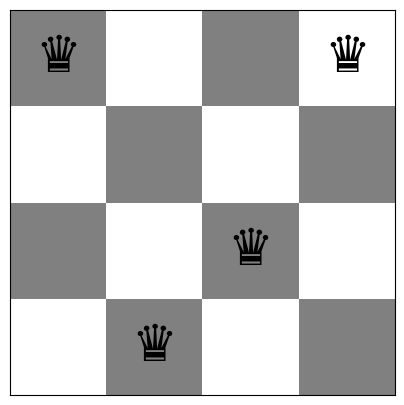

Step 63: conflicts = 3, T=53.63


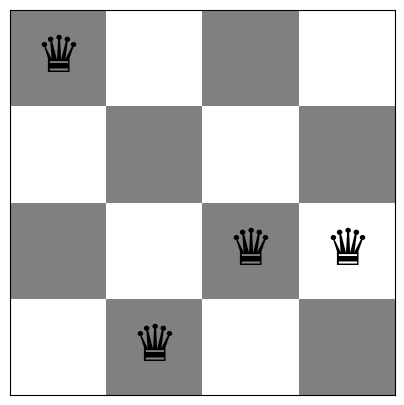

Step 64: conflicts = 4, T=53.09


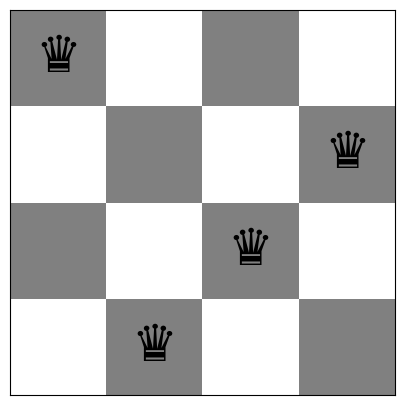

Step 65: conflicts = 3, T=52.56


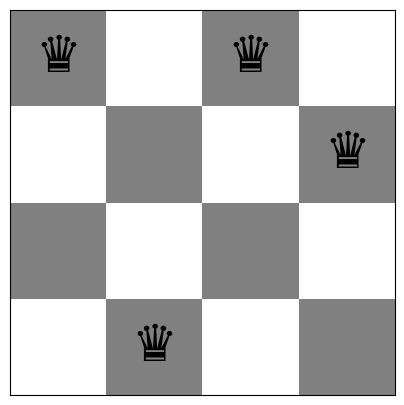

Step 66: conflicts = 3, T=52.03


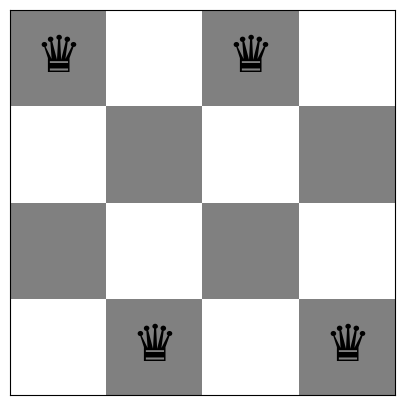

Step 67: conflicts = 3, T=51.51


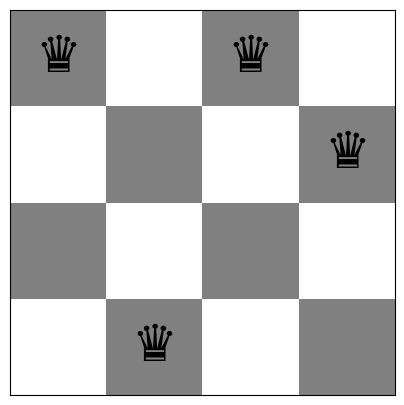

Step 68: conflicts = 3, T=51.00


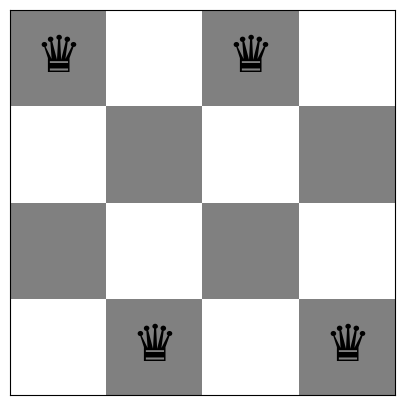

Step 69: conflicts = 2, T=50.49


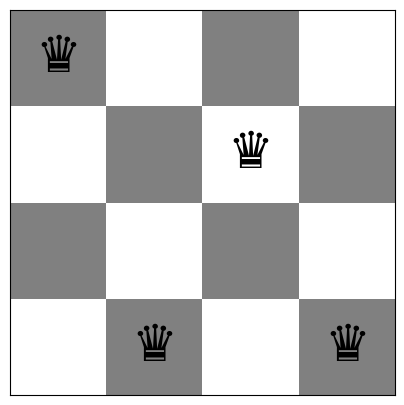

Step 70: conflicts = 5, T=49.98


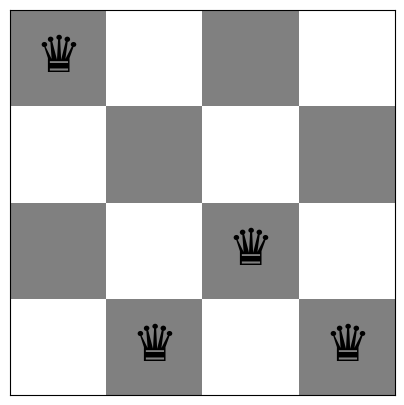

Step 71: conflicts = 4, T=49.48


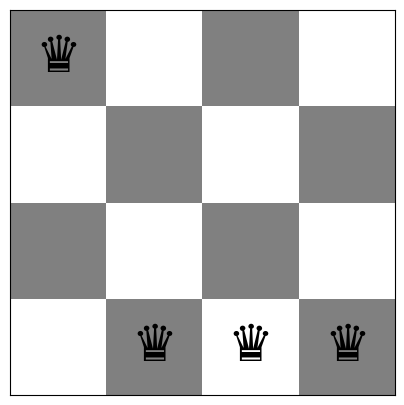

Step 72: conflicts = 4, T=48.99


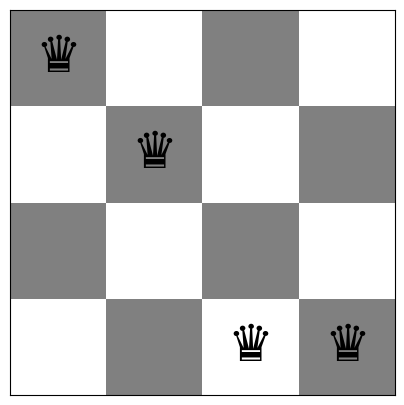

Step 73: conflicts = 5, T=48.50


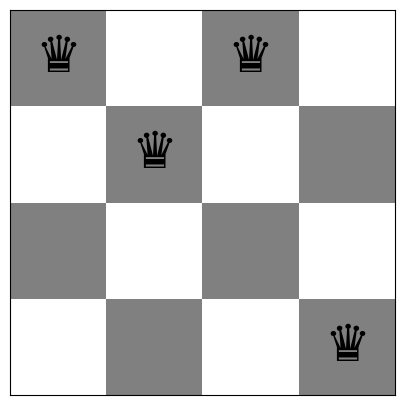

Step 74: conflicts = 4, T=48.01


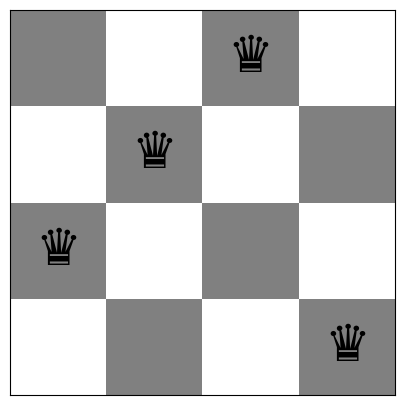

Step 75: conflicts = 3, T=47.53


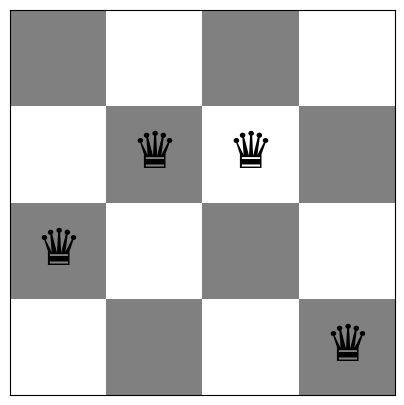

Step 76: conflicts = 2, T=47.06


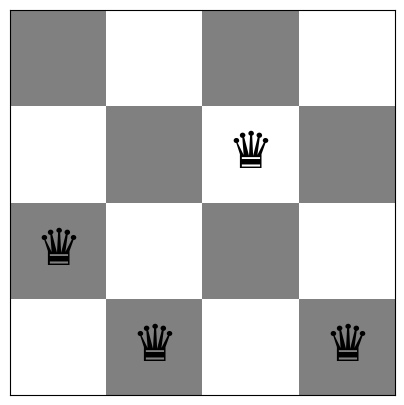

Step 77: conflicts = 3, T=46.59


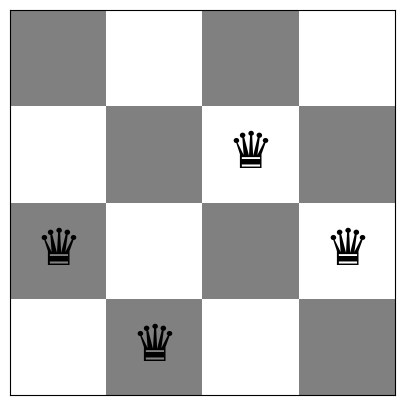

Step 78: conflicts = 3, T=46.12


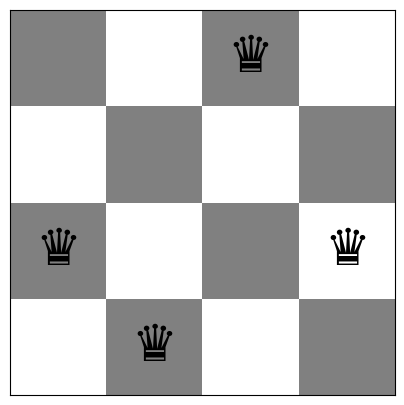

Step 79: conflicts = 0, T=45.66


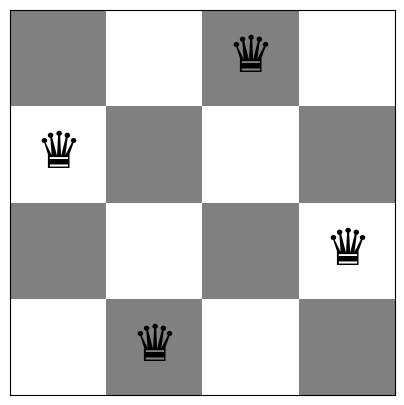

Solution found at step 79!
Final solution: [2, 0, 3, 1]
Final conflicts: 0


In [8]:
import math

def simulated_annealing(n, max_steps=10000, T_init=100, alpha=0.99, seed=None, show_steps=False):

    if seed is not None:
        random.seed(seed)

    current = random_state(n)
    current_conf = conflicts(current)
    T = T_init

    if show_steps:
        print(f"Initial state (conflicts = {current_conf})")
        show_board(current)

    for step in range(1, max_steps+1):
        # sinh 1 neighbor ngẫu nhiên
        neighbor = random_neighbor(current)
        neighbor_conf = conflicts(neighbor)
        delta = neighbor_conf - current_conf

        # chấp nhận nếu tốt hơn hoặc với xác suất exp(-delta/T)
        if delta < 0 or random.random() < math.exp(-delta / T):
            current, current_conf = neighbor, neighbor_conf
            if show_steps:
                print(f"Step {step}: conflicts = {current_conf}, T={T:.2f}")
                show_board(current)

        # kiểm tra đã tìm lời giải
        if current_conf == 0:
            print(f"Solution found at step {step}!")
            break

        # giảm nhiệt độ
        T *= alpha

    if current_conf != 0:
        print(f"Stopped after {max_steps} steps. Final conflicts = {current_conf}")

    return current, current_conf


# --- Ví dụ chạy ---
if __name__ == "__main__":
    solution, final_conf = simulated_annealing(
      n=4, max_steps=10000, T_init=100, alpha=0.99, seed=1234, show_steps=True
    )
    print("Final solution:", solution)
    print("Final conflicts:", final_conf)


## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [9]:
import time

# --- Hàm benchmark ---
def compare_algorithms(sizes=[4, 8, 12, 16], max_steps=1000):
    algorithms = {
        "Steepest-Ascent": steepest_ascent_hill_climbing,
        "Stochastic": stochastic_hill_climbing,
        "First-Choice": first_choice_hill_climbing,
        "Simulated Annealing": simulated_annealing
    }

    results = {}

    for n in sizes:
        print(f"\n=== Board size n={n} ===")
        results[n] = {}
        for name, func in algorithms.items():
            start_time = time.time()
            # chạy thuật toán, tắt show_steps để nhanh
            solution, final_conf = func(n, max_steps=max_steps, seed=1234, show_steps=False)
            end_time = time.time()

            runtime = end_time - start_time
            results[n][name] = {
                "runtime": runtime,
                "final_conflicts": final_conf,
                "solution": solution
            }
            print(f"{name:20s} | Time: {runtime:.4f}s | Conflicts: {final_conf}")

    return results


# --- Ví dụ chạy ---
if __name__ == "__main__":
    sizes = [4, 8, 12]
    max_steps = 2000
    results = compare_algorithms(sizes=sizes, max_steps=max_steps)



=== Board size n=4 ===
Stopped at step 2. Local optimum with 1 conflicts.
Steepest-Ascent      | Time: 0.0001s | Conflicts: 1
Stopped at step 1. Local optimum with 2 conflicts.
Stochastic           | Time: 0.0001s | Conflicts: 2
Stopped after 2000 steps. Local optimum with 2 conflicts.
First-Choice         | Time: 0.0060s | Conflicts: 2
Solution found at step 79!
Simulated Annealing  | Time: 0.0003s | Conflicts: 0

=== Board size n=8 ===
Solution found at step 5!
Steepest-Ascent      | Time: 0.0013s | Conflicts: 0
Stopped at step 8. Local optimum with 1 conflicts.
Stochastic           | Time: 0.0024s | Conflicts: 1
Solution found at step 36!
First-Choice         | Time: 0.0002s | Conflicts: 0
Stopped after 2000 steps. Final conflicts = 1
Simulated Annealing  | Time: 0.0145s | Conflicts: 1

=== Board size n=12 ===
Stopped at step 4. Local optimum with 2 conflicts.
Steepest-Ascent      | Time: 0.0071s | Conflicts: 2
Stopped at step 5. Local optimum with 3 conflicts.
Stochastic          

In [ ]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [ ]:
# Code goes here